
## Практична робота №4.Алгоритми пошуку та їх складність
## Виконав: Буханцев Максим


## Хід роботи



### №1 Оцінити асимптотичну складність алгоритму лінійного пошуку у 𝑂-нотації в найгіршому і в найкращому випадку. Як можна покращити алгоритм лінійного пошуку?
- У найгіршому випадку: O(n), де n — кількість елементів у списку. Це відбувається, коли елемент знаходиться в кінці списку або відсутній.
- У кращому випадку: O(1), коли елемент є першим у списку.


In [42]:

# Лінійний пошук
def linear_search(arr, target):
    for i, element in enumerate(arr):
        if element == target:
            return i  
    return -1  


### №2 Оцінити асимптотичну складність алгоритму бінарного пошуку у 𝑂-нотації в найгіршому і в найкращому випадку.
- У найгіршому випадку: O(log n), де n — кількість елементів у списку. Пошук здійснюється шляхом ділення списку навпіл.
- У кращому випадку: O(1), коли елемент знаходиться в середині списку на першій ітерації.


In [44]:

# Бінарний пошук
def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1


### №3 Побудувати алгоритм тернарного пошуку і оцінити його асимптотичну складність алгоритму у 𝑂-нотації в найгіршому і в найкращому випадку. Який з алгоритмів є оптимальнішим: бінарний, чи тернарний? 
- У найгіршому випадку: O(log3 n), де n — кількість елементів у списку.
- У кращому випадку: O(1), коли елемент знаходиться в одній з точок поділу.


In [46]:

# Тернарний пошук
def ternary_search(arr, target, left, right):
    if left > right:
        return -1
    mid1 = left + (right - left) // 3
    mid2 = right - (right - left) // 3
    if arr[mid1] == target:
        return mid1
    if arr[mid2] == target:
        return mid2
    if target < arr[mid1]:
        return ternary_search(arr, target, left, mid1 - 1)
    elif target > arr[mid2]:
        return ternary_search(arr, target, mid2 + 1, right)
    else:
        return ternary_search(arr, target, mid1 + 1, mid2 - 1)

### №4 Порівняти ефективність алгоритмів лінійного, бінарного та тернарного пошуку для різних розмірів вхідного списку. Для цього провести експериментальне дослідження та побудувати графіки залежності часу виконання алгоритму від розміру вхідного списку.

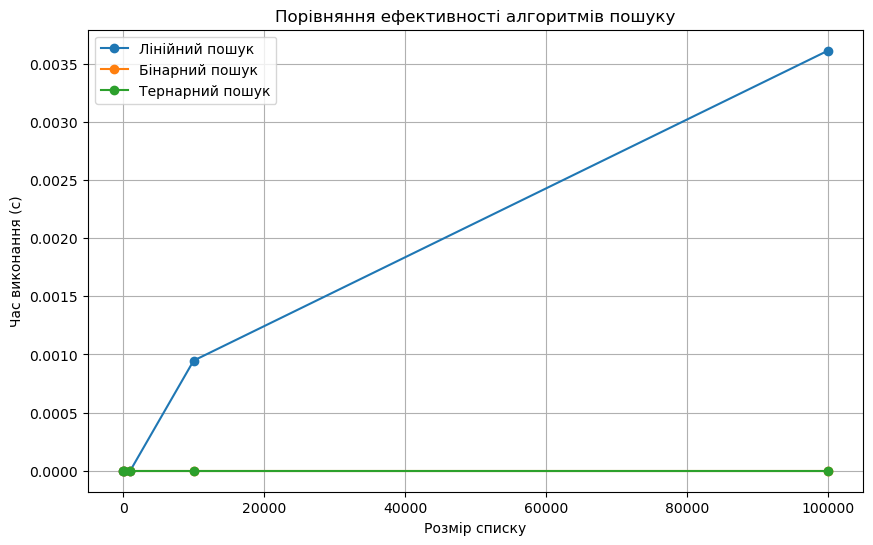

In [48]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

sizes = [10, 100, 1000, 10000, 100000]
linear_times = []
binary_times = []
ternary_times = []

for size in sizes:
    arr = sorted(random.sample(range(size * 10), size))
    target = random.choice(arr)
    

    start = time.time()
    linear_search(arr, target)
    end = time.time()
    linear_times.append(end - start)
    

    start = time.time()
    binary_search(arr, target)
    end = time.time()
    binary_times.append(end - start)
    

    start = time.time()
    ternary_search(arr, target, 0, len(arr) - 1)
    end = time.time()
    ternary_times.append(end - start)

plt.figure(figsize=(10, 6))
plt.plot(sizes, linear_times, label="Лінійний пошук", marker='o')
plt.plot(sizes, binary_times, label="Бінарний пошук", marker='o')
plt.plot(sizes, ternary_times, label="Тернарний пошук", marker='o')
plt.xlabel("Розмір списку")
plt.ylabel("Час виконання (с)")
plt.title("Порівняння ефективності алгоритмів пошуку")
plt.legend()
plt.grid(True)
plt.show()

#### Лінійний пошук значно повільніший для великих списків, оскільки має O(n) складність.

#### Бінарний і тернарний пошуки демонструють схожу продуктивність через логарифмічну залежність O(log n).

#### Бінарний пошук трохи швидший за тернарний, оскільки виконує менше порівнянь.

### №5 Порівняти алгоритми пошуку за їхньою здатністю працювати з відсортованими та не відсортованими списками. Провести аналіз впливу відсортованості списку на час виконання кожного алгоритму.

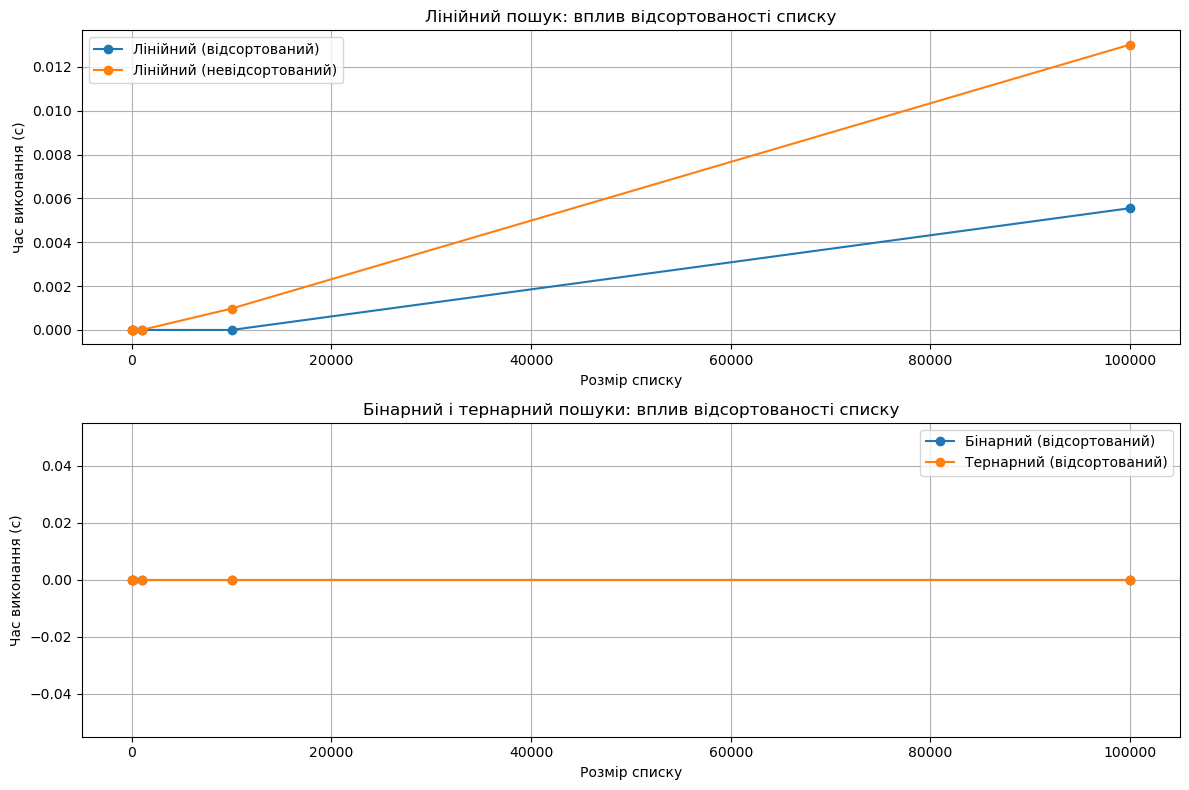

In [51]:
def measure_time(func, *args):
    start = time.time()
    func(*args)
    end = time.time()
    return end - start

linear_sorted_times = []
linear_unsorted_times = []
binary_sorted_times = []
binary_unsorted_times = []
ternary_sorted_times = []
ternary_unsorted_times = []

for size in sizes:
    
    sorted_list = sorted(random.sample(range(size * 10), size))
    unsorted_list = random.sample(range(size * 10), size)
    target = sorted_list[size // 2]
    
    # Лінійний пошук
    linear_sorted_times.append(measure_time(linear_search, sorted_list, target))
    linear_unsorted_times.append(measure_time(linear_search, unsorted_list, target))
    
    # Бінарний пошук
    binary_sorted_times.append(measure_time(binary_search, sorted_list, target))
    
    # Тернарний пошук
    ternary_sorted_times.append(measure_time(ternary_search, sorted_list, target, 0, len(sorted_list) - 1))
    
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(sizes, linear_sorted_times, label="Лінійний (відсортований)", marker='o')
plt.plot(sizes, linear_unsorted_times, label="Лінійний (невідсортований)", marker='o')
plt.xlabel("Розмір списку")
plt.ylabel("Час виконання (с)")
plt.title("Лінійний пошук: вплив відсортованості списку")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(sizes, binary_sorted_times, label="Бінарний (відсортований)", marker='o')
plt.plot(sizes, ternary_sorted_times, label="Тернарний (відсортований)", marker='o')
plt.xlabel("Розмір списку")
plt.ylabel("Час виконання (с)")
plt.title("Бінарний і тернарний пошуки: вплив відсортованості списку")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Відповіді на контрольні питання
## 1. Що таке алгоритм пошуку і чому він важливий у контексті комп'ютерних наук?  
**Відповідь:** Алгоритм пошуку — це процес знаходження елемента в структурі даних. Він є ключовим, оскільки дозволяє ефективно опрацьовувати великі обсяги даних.
## 2. Які основні критерії оцінки ефективності алгоритмів пошуку?  
**Відповідь:** Основні критерії — це часова складність, просторова складність та стабільність роботи на різних наборах даних.

## 3. Що таке лінійний пошук, і як він працює?

**Відповідь:**  
Лінійний пошук – це алгоритм, який проходить через елементи списку один за одним, порівнюючи їх із цільовим значенням. Якщо елемент знайдено, алгоритм повертає його індекс. Якщо ні, повертає -1. Його часова складність – O(n).

## 4. Які умови повинні бути виконані для успішного застосування бінарного пошуку?

**Відповідь:**  
Для бінарного пошуку необхідно щоб список був відсортованим, та доступ до елементів має бути можливим за індексом.
   
## 5. Які переваги та недоліки використання бінарного пошуку порівняно з іншими алгоритмами пошуку?

**Відповідь:**  
**Переваги:**  
1. Швидкість пошуку (O(log n)), особливо на великих наборах даних.  
2. Простота реалізації для відсортованих даних.  

**Недоліки:**  
1. Неможливість роботи з невідсортованими списками без попередньої обробки.  
2. Може бути складнішим у реалізації порівняно з лінійним пошуком.  

## 6. Що таке тернарний пошук, і в чому його відмінність від бінарного пошуку?

**Відповідь:**  
Тернарний пошук – це алгоритм, який розділяє список на три частини, а не дві, як у бінарному пошуку. Він перевіряє два середні елементи для визначення діапазону пошуку. Основна відмінність – це кількість діапазонів, які перевіряються: у тернарному пошуку їх три, у бінарному – два.  

